# Logistic Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

## Importing the dataset

In [ ]:
df1 = pd.read_csv('Cleaned Train_Data.csv')
df2 = pd.read_csv('Cleaned Train_Labels.csv')
df3 = pd.read_csv('Cleaned_test_data.csv')
df4 = pd.read_csv('Cleaned_test_labels.csv')


In [ ]:
X_train = df1.iloc[:,:].values
y_train = df2.iloc[:,:].values
X_test =  df3.iloc[:,:].values
y_test =  df4.iloc[:,:].values

In [ ]:
y_train = y_train.flatten() 

In [ ]:
y_test = y_test.flatten() 

In [ ]:
df1.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,13,0.0,9.10,64,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,13,20.0,5.00,57,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,15,37.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9,20.0,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20,39.6,23.76,41,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df2.head()

,Claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
df3.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,Product Name_24 Protect,Product Name_Annual Gold Plan,Product Name_Annual Silver Plan,Product Name_Annual Travel Protect Gold,Product Name_Annual Travel Protect Platinum,Product Name_Annual Travel Protect Silver,Product Name_Basic Plan,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Child Comprehensive Plan,Product Name_Comprehensive Plan,Product Name_Gold Plan,Product Name_Individual Comprehensive Plan,Product Name_Premier Plan,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Single Trip Travel Protect Gold,Product Name_Single Trip Travel Protect Platinum,Product Name_Single Trip Travel Protect Silver,Product Name_Spouse or Parents Comprehensive Plan,Product Name_Ticket Protector,Product Name_Travel Cruise Protect,Product Name_Value Plan,Gender_F,Gender_M,Gender_Not Specified
0,11,62.25,15.56,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,11,0.00,65.34,48,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,90,38.00,0.00,36,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,34,20.00,0.00,35,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8,80.00,0.00,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df4.head()

,Claim
0,1
1,0
2,0
3,0
4,0


In [ ]:
print(X_train)

[[ 13.           0.           9.1        ...   0.           1.
    0.        ]
 [ 13.          20.           5.         ...   1.           0.
    0.        ]
 [ 15.          37.           0.         ...   0.           0.
    1.        ]
 ...
 [221.          20.           0.         ...   0.           0.
    1.        ]
 [  8.          21.61431709   5.40777411 ...   0.           1.
    0.        ]
 [  6.          27.43075118   6.85768779 ...   0.           0.
    0.        ]]


In [ ]:
print(X_test)

[[11.   62.25 15.56 ...  0.    1.    0.  ]
 [11.    0.   65.34 ...  0.    0.    1.  ]
 [90.   38.    0.   ...  0.    0.    1.  ]
 ...
 [35.    8.63  2.42 ...  0.    0.    1.  ]
 [28.   80.    0.   ...  0.    0.    1.  ]
 [69.   11.95  3.35 ...  0.    0.    1.  ]]


In [ ]:
print(y_train)

[0 0 0 ... 1 1 1]


In [ ]:
print(y_test)

[1 0 0 ... 0 0 0]


## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,max_iter=1000000)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[8849  658]
 [ 100   45]]


0.9214670534604227

In [ ]:
# generate a no claim prediction (majority class)
default_probs = [0 for _ in range(len(y_test))]

In [ ]:
#Probabilities of the predictions
lr_prob = classifier.predict_proba(X_test)



In [ ]:
#We will use probabilities for the positive class only
lr_prob = lr_prob[:,1]

In [ ]:
default_auc = roc_auc_score(y_test, default_probs)
lr_auc = roc_auc_score(y_test, lr_prob)

In [ ]:
# summarize scores
print('No Claim: ROC AUC=%.3f' % (default_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

No Claim: ROC AUC=0.500
Logistic Regression: ROC AUC=0.767


In [ ]:
# calculate roc curves
default_fpr, default_tpr, _ = roc_curve(y_test, default_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_prob)

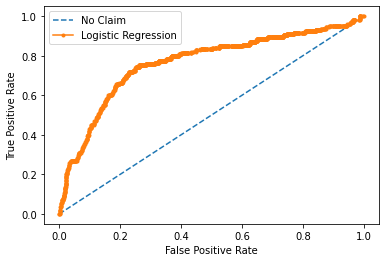

In [ ]:
# plot the roc curve for the model
pyplot.plot(default_fpr, default_tpr, linestyle='--', label='No Claim')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()